In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/0rame/Desktop/ML_tutorials/internship/Customer_churn_project/datas/Telco-Customer-Churn_XGboost.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### EDA

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

no null values and no duplicates in the dataset

<Axes: >

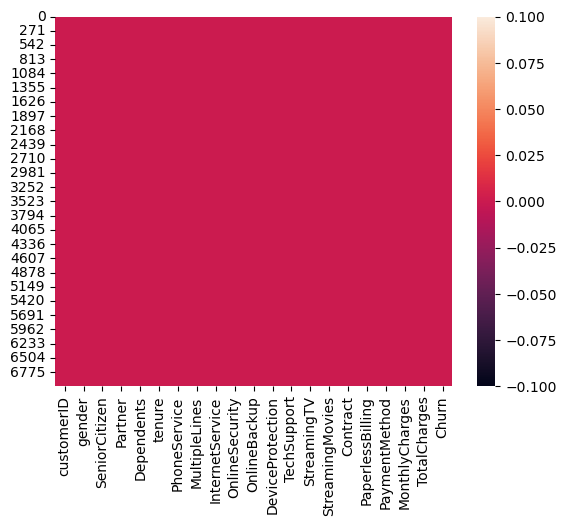

In [7]:
sns.heatmap(df.isnull())

### Analysis of target variable

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df['Churn'] = df['Churn'].map({'No':0,'Yes':1})

In [10]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

here i converted df['Churn'] values 'No' into 0 and 'Yes' into 1

ORU TARGET CHURN CONTAINS ONLY TWO DIFFERENT CLASSES OF VARIABLES,, BUT TARGET IS NOT AT ALL BALANCED

([<matplotlib.patches.Wedge at 0x1cbf07004d0>,
 [Text(-0.7393678277834757, 0.8144539368428056, '0'),
  Text(0.7393677515287918, -0.8144540060674139, '1')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.46%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.54%')])

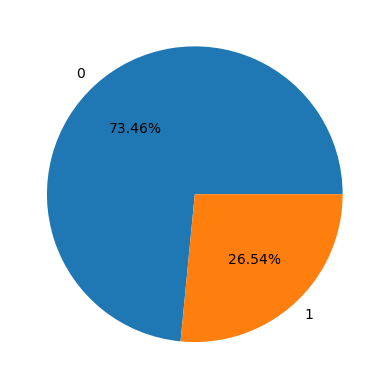

In [11]:
plt.pie(df['Churn'].value_counts().values,labels=df['Churn'].value_counts().index,autopct="%1.2f%%")

### FEATURE COLUMNS:UNIVARIATE ANALYSIS

([<matplotlib.patches.Wedge at 0x1cbf0d2b6d0>,
 [Text(-0.05860659335486817, 1.0984376483056912, 'No'),
  Text(0.05860649051171347, -1.0984376537928315, 'Yes')],
 [Text(-0.031967232739019, 0.5991478081667406, '51.70%'),
  Text(0.031967176642752795, -0.5991478111597263, '48.30%')])

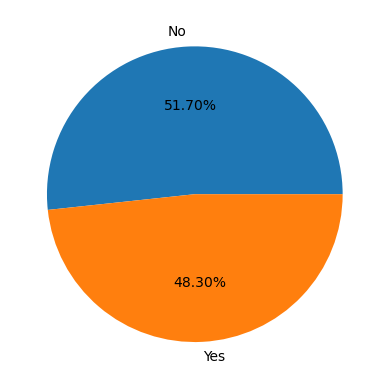

In [12]:
plt.pie(df['Partner'].value_counts().values,labels=df['Partner'].value_counts().index,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x1cbf0d73210>,
 [Text(-0.6477143548699043, 0.8890816129554495, 'No'),
  Text(0.6477142716280732, -0.8890816735988403, 'Yes')],
 [Text(-0.35329873901994774, 0.4849536070666088, '70.04%'),
  Text(0.35329869361531263, -0.4849536401448219, '29.96%')])

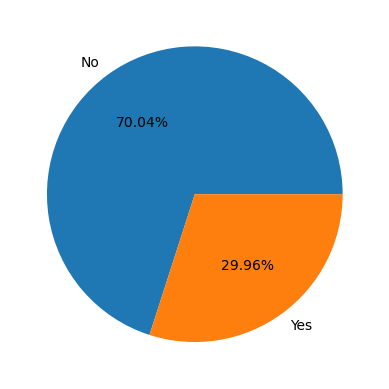

In [13]:
plt.pie(df['Dependents'].value_counts().values,labels=df['Dependents'].value_counts().index,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x1cbf0dbea50>,
 [Text(-0.05860659335486817, 1.0984376483056912, 'No'),
  Text(0.05860649051171347, -1.0984376537928315, 'Yes')],
 [Text(-0.031967232739019, 0.5991478081667406, '51.70%'),
  Text(0.031967176642752795, -0.5991478111597263, '48.30%')])

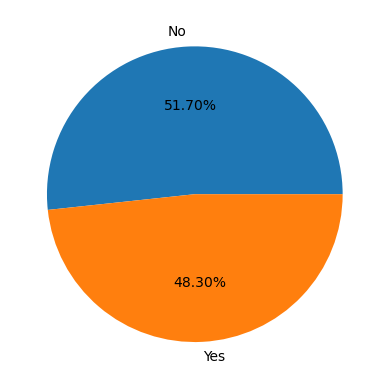

In [14]:
plt.pie(df['Partner'].value_counts().values,labels=df['Partner'].value_counts().index,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x1cbf0e0e7d0>,
 [Text(-1.0494915966975706, 0.3294956577273573, 'Yes'),
  Text(1.049491627547176, -0.32949555946686127, 'No')],
 [Text(-0.5724499618350385, 0.17972490421492215, '90.32%'),
  Text(0.5724499786620959, -0.17972485061828794, '9.68%')])

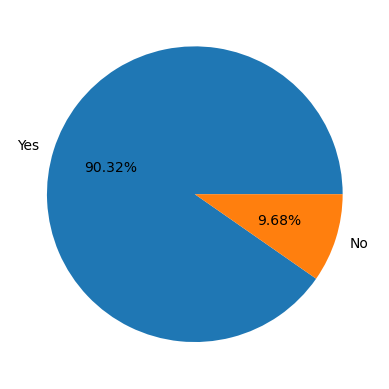

In [15]:
plt.pie(df['PhoneService'].value_counts().values,labels=df['PhoneService'].value_counts().index,autopct="%1.2f%%")

PhoneService ALSO CONTAINS YES AND NO ,HERE NO IS VERY LESS MOST HAVE CONNECTION OF PHON SERVICE
need to balance it

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

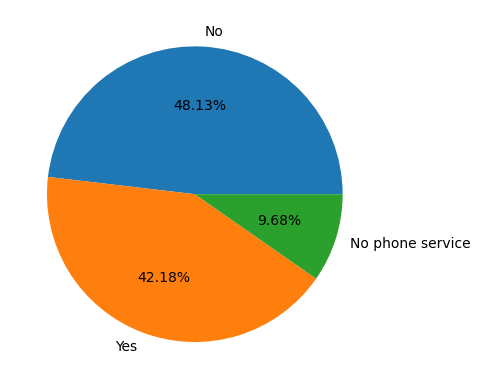

In [16]:
plt.pie(df['MultipleLines'].value_counts().values,labels=df['MultipleLines'].value_counts().index,autopct="%1.2f%%")
df['MultipleLines'].value_counts()

No 3390,Yes 2971,No phone service 682,THESE ARE THE THREE ENTRIES IN MULTIPLE LINES

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

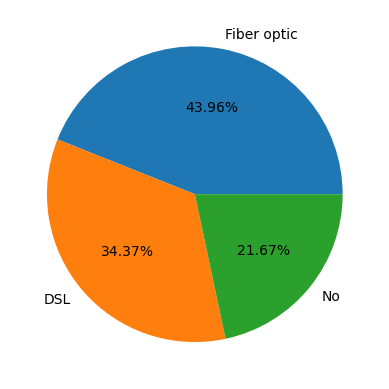

In [17]:
plt.pie(df['InternetService'].value_counts().values,labels=df['InternetService'].value_counts().index,autopct="%1.2f%%")
df['InternetService'].value_counts()

can see balanced value counts

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

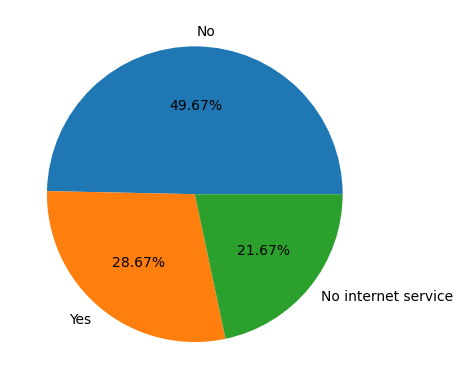

In [18]:
plt.pie(df['OnlineSecurity'].value_counts().values,labels=df['OnlineSecurity'].value_counts().index,autopct="%1.2f%%")
df['OnlineSecurity'].value_counts()

### bivariate analysis

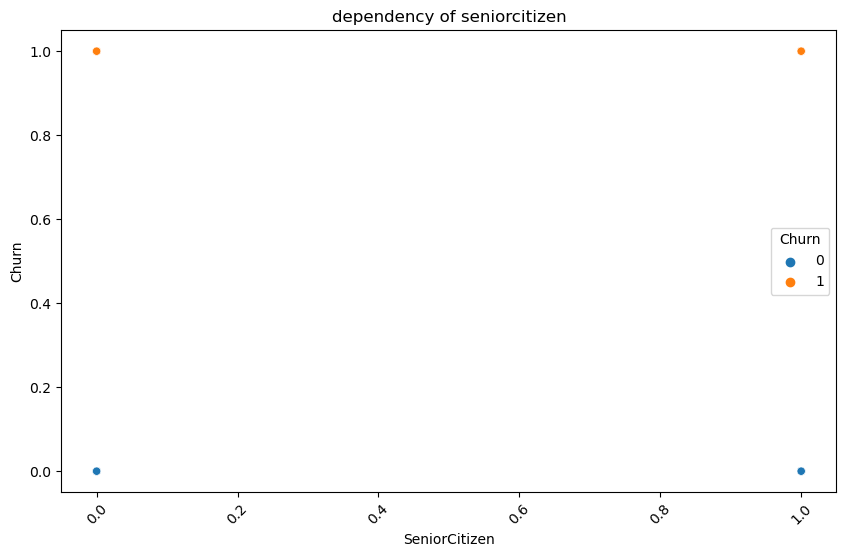

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['SeniorCitizen'],y=df['Churn'],hue=df['Churn'])
plt.title("dependency of seniorcitizen")
plt.xticks(rotation=45)
plt.xlabel('SeniorCitizen')
plt.ylabel('Churn')
plt.show()

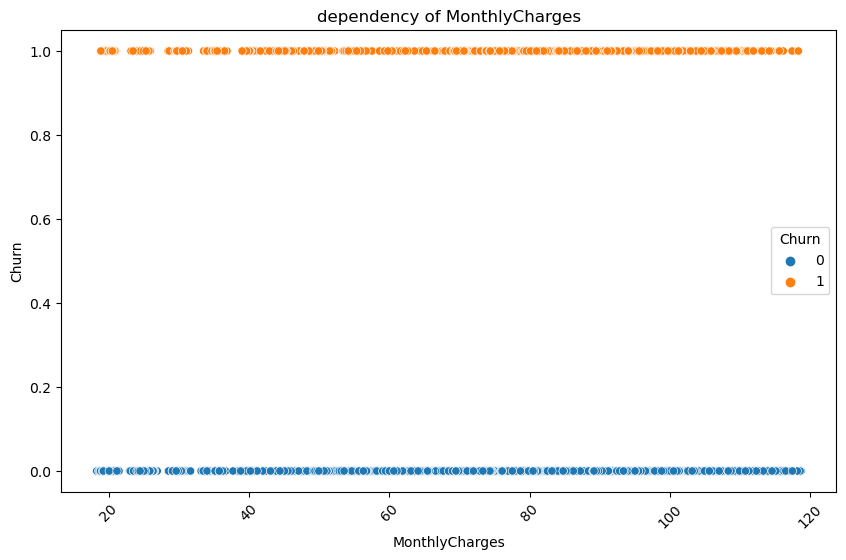

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['MonthlyCharges'],y=df['Churn'],hue=df['Churn'])
plt.title("dependency of MonthlyCharges")
plt.xticks(rotation=45)
plt.xlabel('MonthlyCharges')
plt.ylabel('Churn')
plt.show()

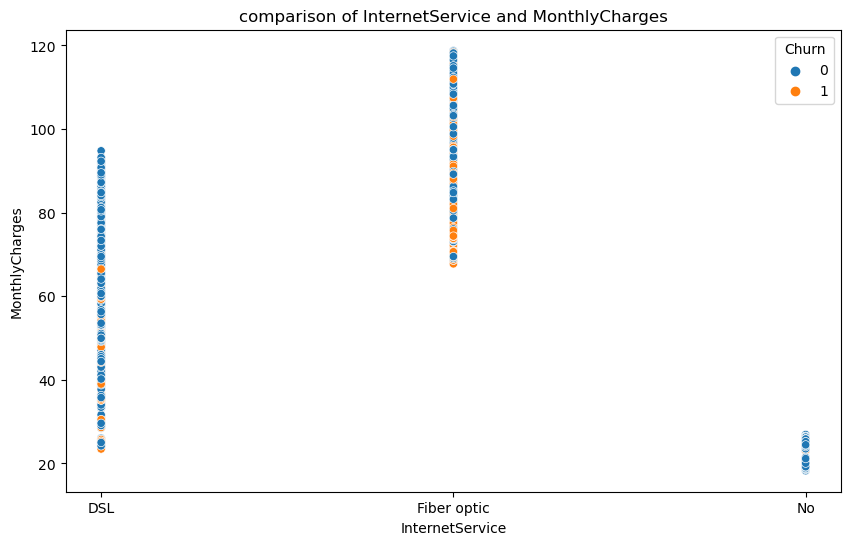

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['InternetService'],y=df['MonthlyCharges'],hue=df['Churn'])
plt.title("comparison of InternetService and MonthlyCharges")
plt.xlabel("InternetService")
plt.ylabel("MonthlyCharges")
plt.show()

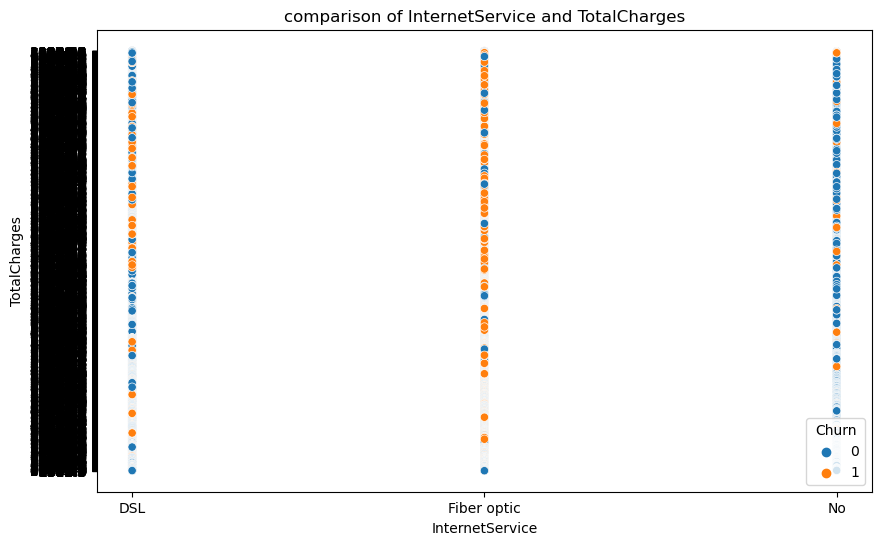

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['InternetService'],y=df['TotalCharges'],hue=df['Churn'])
plt.title("comparison of InternetService and TotalCharges")
plt.xlabel("InternetService")
plt.ylabel("TotalCharges")
plt.show()

#### Plotting distplot checking distribution

C:\Users\0rame\AppData\Local\Temp\ipykernel_23180\3784316270.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'],fit=norm)


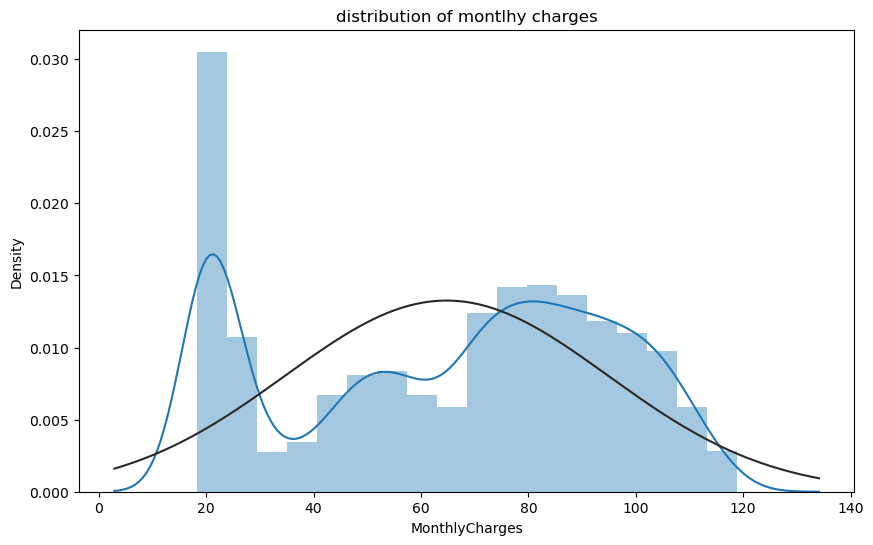

In [23]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.distplot(df['MonthlyCharges'],fit=norm)
plt.title("distribution of montlhy charges")
plt.xlabel("MonthlyCharges")
plt.show()

MonthlyCharges IS NOT NORMALLY DISTRIBUTED,SKEWNES PRESENCE IS THERE

### DATA PREPROCESSING


### ENCODING

In [24]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [25]:
for i in df.select_dtypes(include='object'):
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [26]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### PLOTTING BOX PLOT FOR CHECKING OUTLIERS

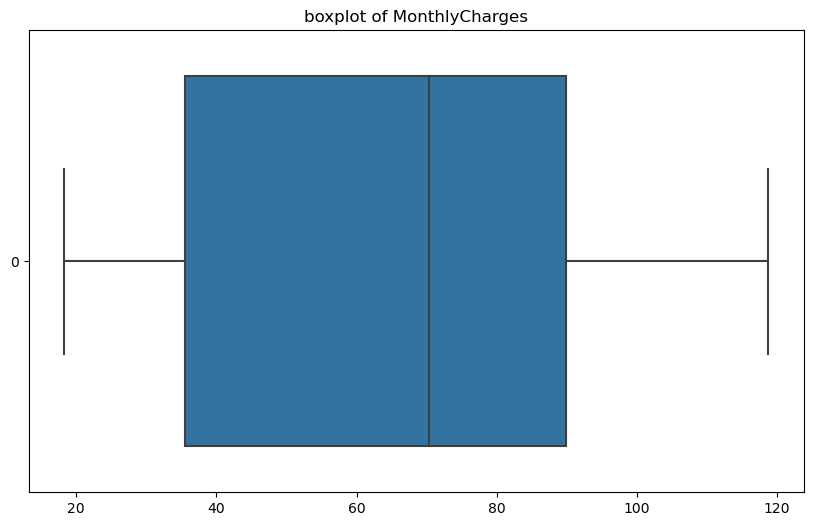

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(df['MonthlyCharges'],orient='h')
plt.title("boxplot of MonthlyCharges")
plt.show()

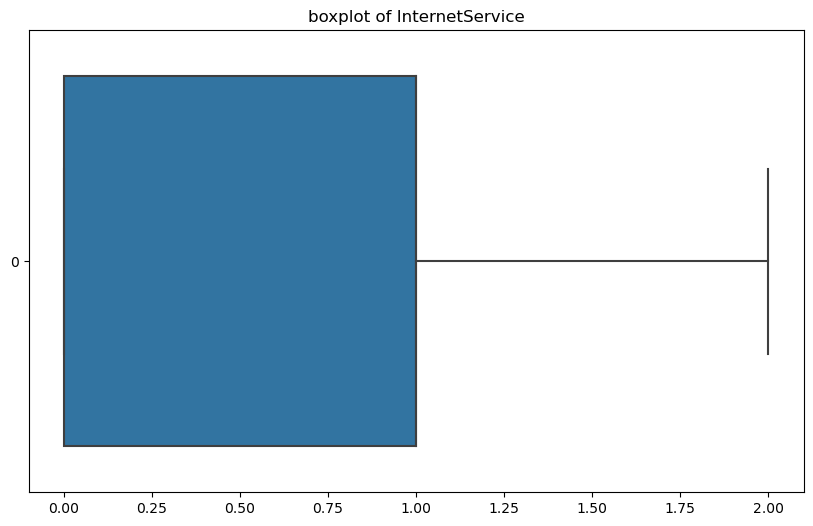

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(df['InternetService'],orient='h')
plt.title("boxplot of InternetService")
plt.show()

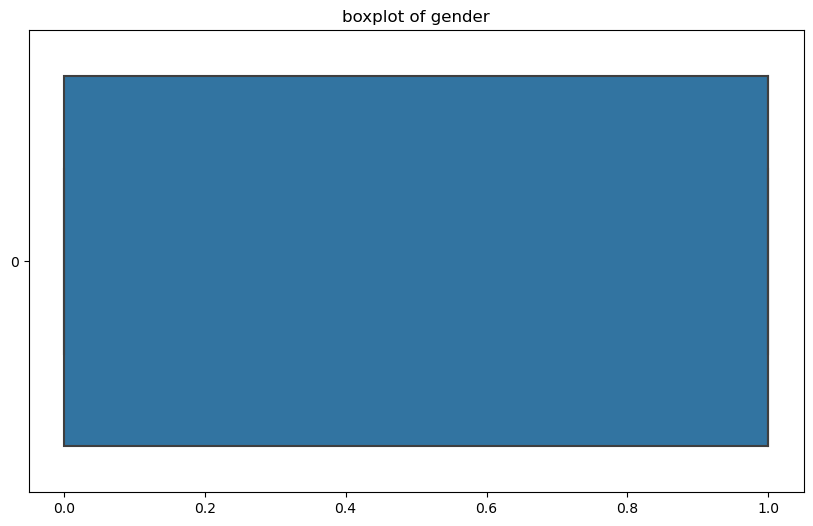

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(df['gender'],orient='h')
plt.title("boxplot of gender")
plt.show()

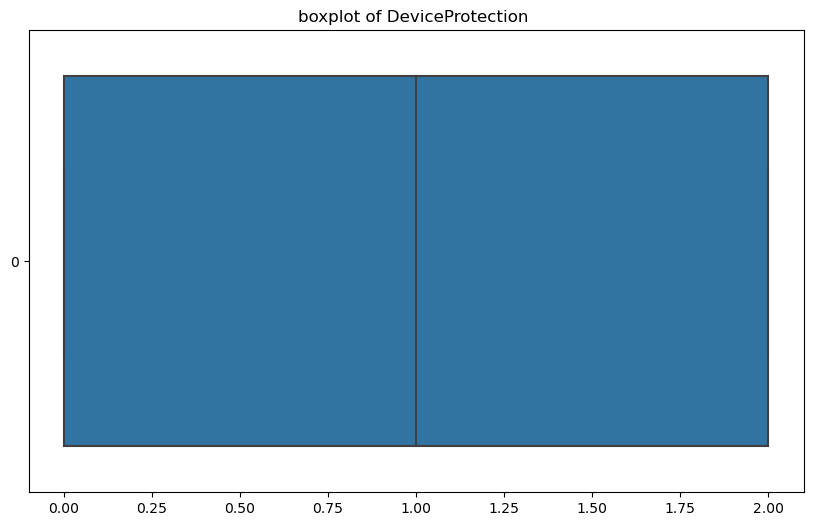

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(df['DeviceProtection'],orient='h')
plt.title("boxplot of DeviceProtection ")
plt.show()

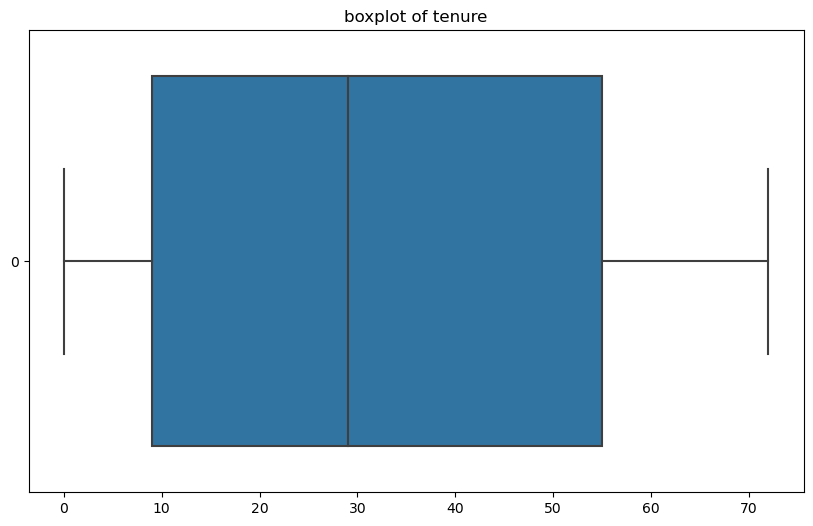

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(df['tenure'],orient='h')
plt.title("boxplot of tenure")
plt.show()

OUTLIERS ARE NOT PRESENT IN THE ANALYSED COLUMNS,SO NO NEED OF TREATING OUTLIERS

In [32]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


pairplotting against Churn

In [33]:
# sns.pairplot(df,hue='Churn')

pairplot shows the relation among different columns

### Correlation 

In [34]:
cor = df.corr()

In [35]:
cor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


<Axes: >

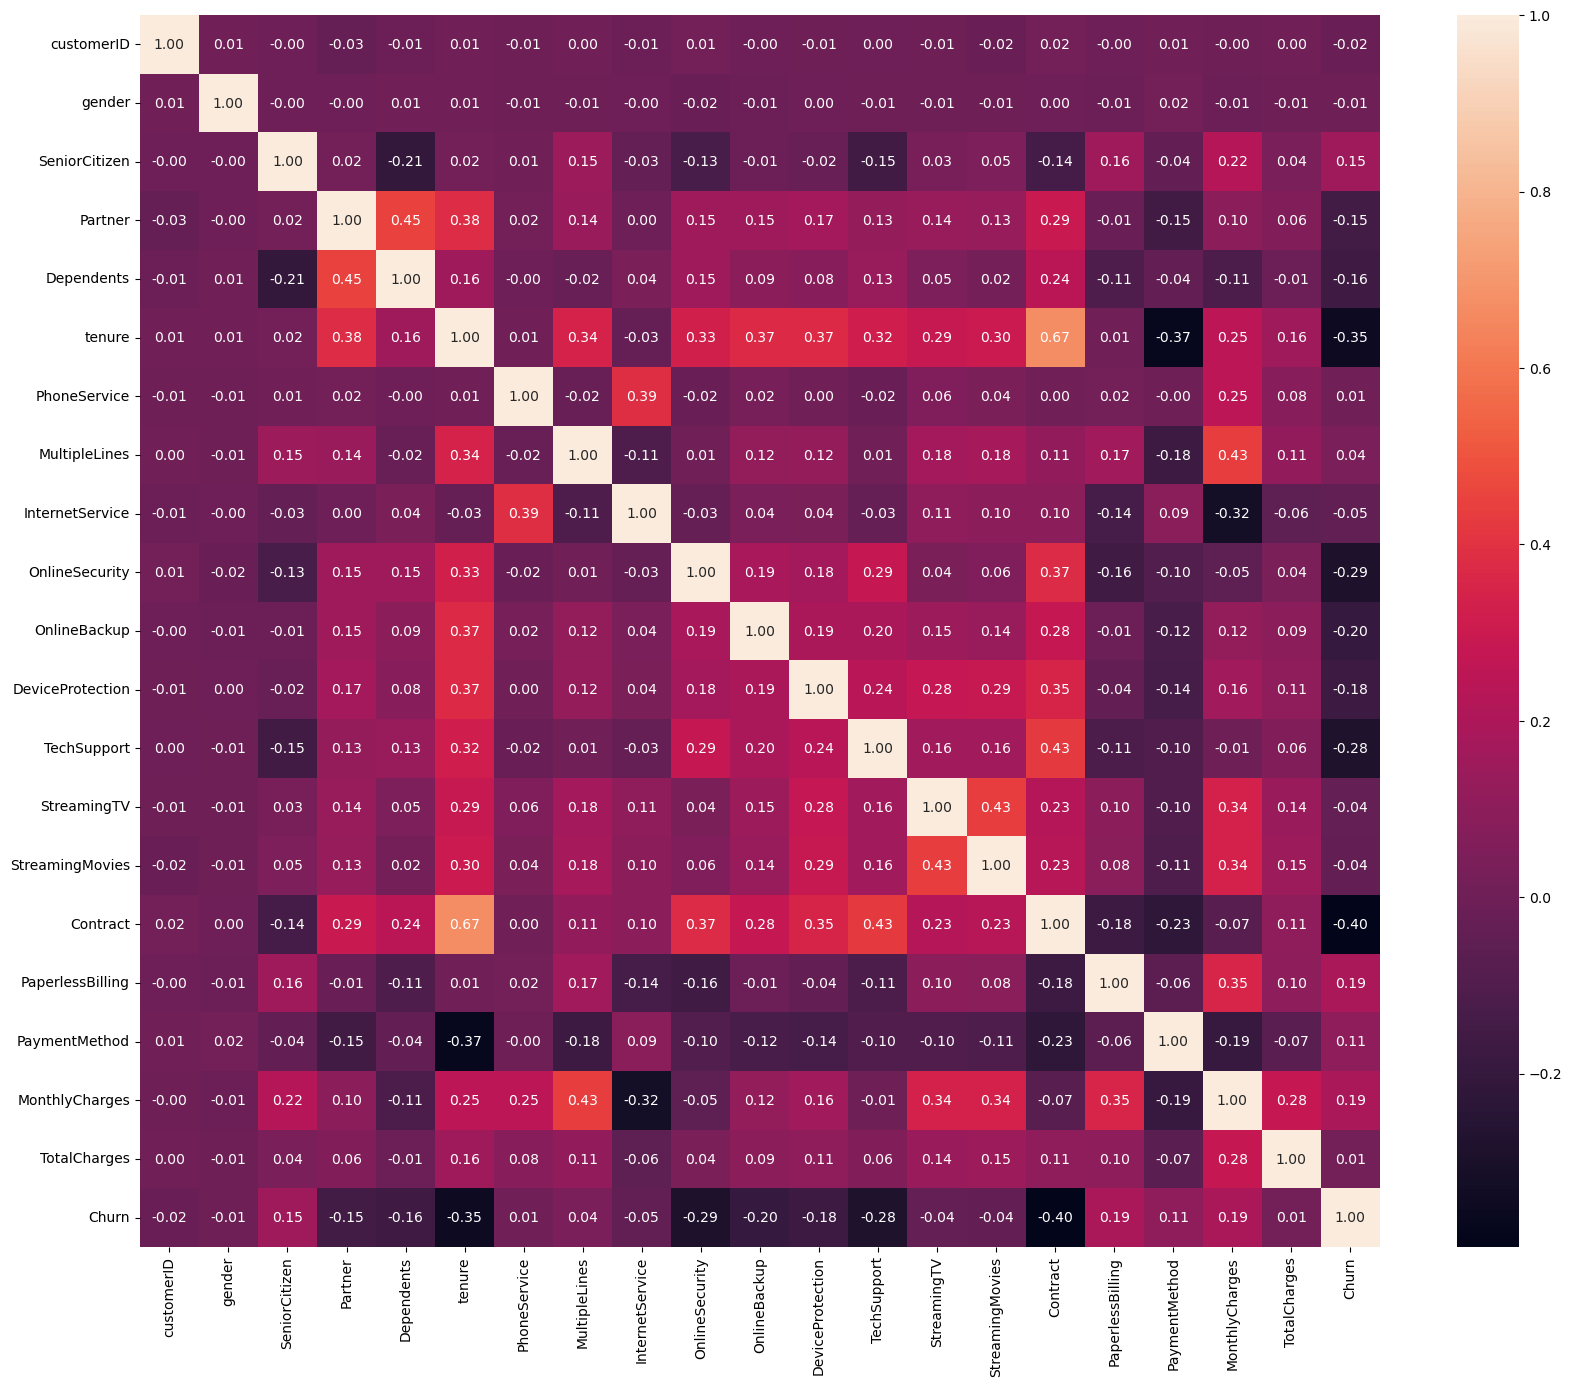

In [36]:
plt.figure(figsize=(20,16))
sns.heatmap(cor,annot=True,linecolor='blue',fmt='0.2f')

heatmap clearley shows the negative correlation in some columns

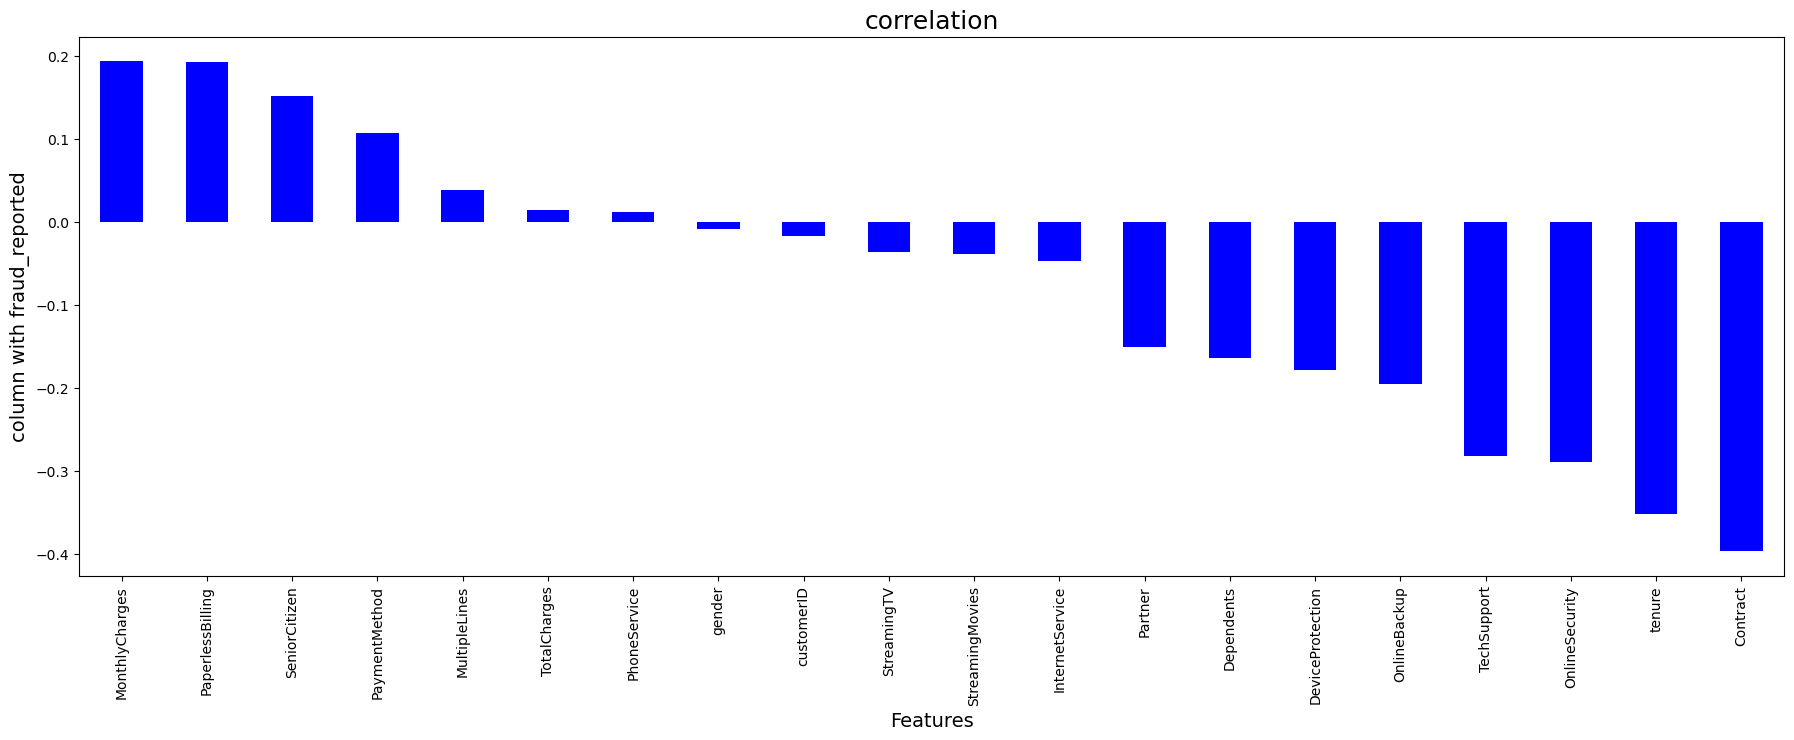

In [37]:
plt.figure(figsize=(22,7))
cor['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=14)
plt.ylabel('column with fraud_reported',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Positive Correlation: Features with positive bars indicate that as the value of the feature increases, the likelihood of churn also increases.
Negative Correlation: Features with negative bars indicate that as the value of the feature increases, the likelihood of churn decreases.
Dropping Features
Deciding whether to drop any features depends on several factors, including:

Correlation Strength: Features with very low correlation values (close to 0) might have little impact on the target variable and could be considered for removal. However, this is not a strict rule, as even features with low correlation might interact with other features in a way that is significant.

Multicollinearity: Features that are highly correlated with each other (multicollinearity) can cause issues in some models (like linear regression). You can check for multicollinearity using the Variance Inflation Factor (VIF). Features with high VIF values might need to be dropped.

Domain Knowledge: Use your knowledge about the business problem to decide whether a feature should be kept or not. Some features might be important for interpretability or have regulatory significance.

Model Performance: Experiment with dropping features and observe the impact on model performance. Sometimes, features that seem insignificant based on correlation might still improve model performance.

Next Steps
Check Multicollinearity:

Calculate the VIF for each feature.
Drop features with high VIF values.
Feature Selection Techniques:

Use feature selection methods like Recursive Feature Elimination (RFE), Lasso regularization, or tree-based feature importance to identify important features.
Model Evaluation:

Train your model with and without the identified features and compare the performance using metrics like accuracy, precision, recall, F1-score, AUC-ROC, etc.

#### Multicollinearity VIF 

In [38]:
x = df.drop('Churn',axis=1)
y = df['Churn']

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)
vif_calc()

    VIF Factor          Features
0     3.556480        customerID
1     1.942648            gender
2     1.367362     SeniorCitizen
3     2.821161           Partner
4     1.955470        Dependents
5     7.488342            tenure
6    14.530031      PhoneService
7     2.755460     MultipleLines
8     4.331303   InternetService
9     2.260538    OnlineSecurity
10    2.436935      OnlineBackup
11    2.624696  DeviceProtection
12    2.386681       TechSupport
13    3.232207       StreamingTV
14    3.257246   StreamingMovies
15    4.173025          Contract
16    2.845467  PaperlessBilling
17    3.066636     PaymentMethod
18   15.588098    MonthlyCharges
19    4.266705      TotalCharges


Both MonthlyCharges,PhoneService are features have VIF values well above 10, indicating very high multicollinearity.
Additionally, tenure (7.488342) also has a VIF value above 5, suggesting moderate multicollinearity.
Drop PhoneService,MonthlyCharges

In [40]:
x = x.drop(['PhoneService'],axis=1)
x.shape

(7043, 19)

Skewness Checking

In [41]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

SeniorCitizen,PhoneService HAVING SKEWNESS HIGH VALUES.but PhoneService had been dropped already.
so we need to remove the skewness

<Axes: ylabel='Frequency'>

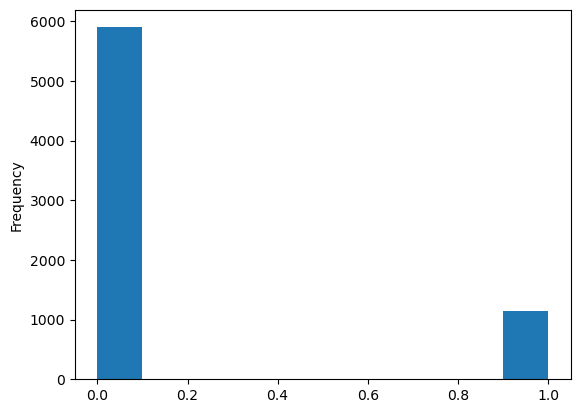

In [42]:
df['SeniorCitizen'].plot.hist()

APPLYING POWER TRANSFORM FOR SKEWNES REMOVAL

In [43]:
from sklearn.preprocessing import PowerTransformer

In [44]:
x.shape

(7043, 19)

In [45]:
y.shape

(7043,)

In [46]:
pt=PowerTransformer(method="yeo-johnson")

In [47]:
x_power = pt.fit_transform(x)
x = pd.DataFrame(x_power,columns=x.columns)
x.skew()

customerID         -0.290930
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

still you can see skewness,plot a boxplot if there outlier present in "PhoneService"

In [48]:
sns.boxplot(x['PhoneService'],orient='h')

KeyError: 'PhoneService'

removing outlier

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data frame, replace with your actual data frame
# df = pd.read_csv('your_data.csv')

# Identify outliers using IQR method
Q1 = df['PhoneService'].quantile(0.25)
Q3 = df['PhoneService'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds for reference
print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')

# Detect outliers
outliers = df[(df['PhoneService'] < lower_bound) | (df['PhoneService'] > upper_bound)]
print(f'Outliers detected:\n{outliers}')

# Remove outliers
df_cleaned = df[(df['PhoneService'] >= lower_bound) & (df['PhoneService'] <= upper_bound)]

# Print the cleaned data for verification
print(f'Cleaned data:\n{df_cleaned}')

# Visualize the result
sns.boxplot(x=df_cleaned['PhoneService'], orient='h')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x is your DataFrame
# Calculate Quartiles and IQR for 'PhoneService'
Q1 = x['PhoneService'].quantile(0.25)
Q3 = x['PhoneService'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds for reference
print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')

# Detect outliers
outliers = x[(x['PhoneService'] < lower_bound) | (x['PhoneService'] > upper_bound)]
print(f'Outliers detected:\n{outliers}')

# Remove outliers
x_cleaned = x[(x['PhoneService'] >= lower_bound) & (x['PhoneService'] <= upper_bound)]

# Print the cleaned data for verification
print(f'Cleaned data:\n{x_cleaned}')

# Visualize the result
sns.boxplot(x=x_cleaned['PhoneService'], orient='h')
plt.show()

In [ ]:
x.skew()

can still see skewness in PhoneService

### removing skewness using sqrt

In [ ]:
from scipy import sqrt

In [ ]:
x["PhoneService"]=np.sqrt(x["PhoneService"])

In [ ]:
x.skew()

In [ ]:
x['PhoneService'].plot.hist()

skewness removed

### SAMPLING TARGET

In [ ]:
plt.pie(x=y.value_counts().values,labels=y.value_counts().index,autopct="%1.2f%%")

it is clear that data is not balanced so we want to balance it

### HERE PREFERING SMOTE OR OVERSAMPLING FOR BALANCING

Balancing your target variable using SMOTE (Synthetic Minority Over-sampling Technique) is a good approach when dealing with imbalanced datasets.
SMOTE generates synthetic samples for the minority class to balance the class distribution. 

Use SMOTE to oversample the minority class in your training data. 
The fit_resample method generates synthetic samples and returns the balanced feature matrix and target variable.

In [49]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\utils\_param_validation.py)

In [50]:
pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.10.1
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: imblearn
Note: you may need to restart the kernel to use updated packages.


### SCALING FEATURES

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
x = scaler.fit_transform(x)
x

array([[ 0.90147756, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.1585412 , -0.28254766],
       [ 0.30015243,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.23949171, -0.88438245],
       [-0.36143839,  0.99053183, -0.43991649, ...,  1.31889872,
        -0.34266505, -1.93709705],
       ...,
       [ 0.02864988, -1.00955867, -0.43991649, ...,  0.40968472,
        -1.16724064, -0.02722738],
       [ 1.12611817,  0.99053183,  2.27315869, ...,  1.31889872,
         0.33431207, -0.20008892],
       [-0.53606758,  0.99053183, -0.43991649, ..., -1.48983732,
         1.33886338,  1.08504111]])

splitting data fro training and testing 

In [55]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=15,test_size=0.3)

In [56]:
xtrain.shape

(4930, 19)

In [57]:
ytrain.shape

(4930,)

### LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [59]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [60]:
pred = lr.predict(xtest)

In [61]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
print("accuracy score = ",accuracy_score(ytest,pred))
print("confusion_matrix = ",confusion_matrix(ytest,pred))
print("classification_report = ",classification_report(ytest,pred))

accuracy score =  0.7988641741599621
confusion_matrix =  [[1395  139]
 [ 286  293]]
classification_report =                precision    recall  f1-score   support

           0       0.83      0.91      0.87      1534
           1       0.68      0.51      0.58       579

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



##### AUC-ROC CURVE

In [64]:
from sklearn.metrics import roc_curve,roc_auc_score

In [65]:
y_pred_prob = lr.predict_proba(xtest)[:,1]

In [68]:
y_pred_prob

array([0.46947966, 0.11998739, 0.01771008, ..., 0.0347548 , 0.02005287,
       0.02959458])

In [69]:
fpr,tpr,threshold = roc_curve(ytest,y_pred_prob)

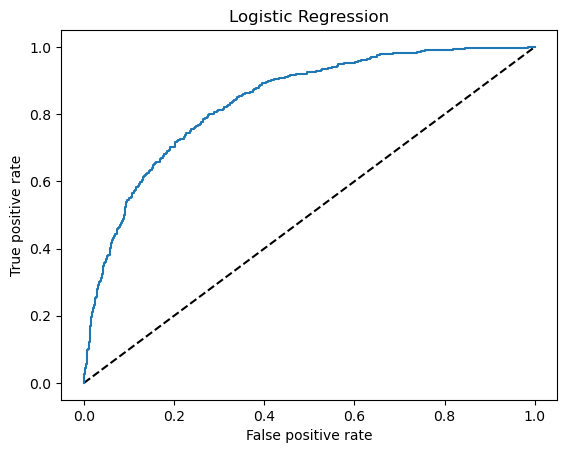

In [70]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression")
plt.show()

### DECISION TREE CLASSSIFIER

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc = DecisionTreeClassifier()

In [73]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [74]:
pred2 = dtc.predict(xtest)

In [75]:
print("accuracy score = ",accuracy_score(ytest,pred2))
print("confusion matrix = ",confusion_matrix(ytest,pred2))
print("classification report = ",classification_report(ytest,pred2))

accuracy score =  0.7373402744912447
confusion matrix =  [[1252  282]
 [ 273  306]]
classification report =                precision    recall  f1-score   support

           0       0.82      0.82      0.82      1534
           1       0.52      0.53      0.52       579

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



In [77]:
y_pred_prob_dtc = dtc.predict_proba(xtest)[:,1]
fpr,tpr,threshold = roc_curve(ytest,y_pred_prob_dtc)

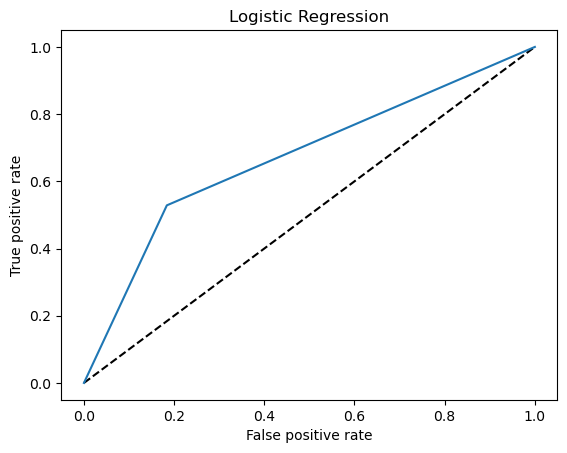

In [82]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression")
plt.show()

### SVM

In [86]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain,ytrain)

SVC()

In [87]:
pred3 = svc.predict(xtest)

In [88]:
print("accuracy = ",accuracy_score(ytest,pred3))
print("confusion matrix = ",confusion_matrix(ytest,pred3))
print("classification report = ",classification_report(ytest,pred3))

accuracy =  0.7941315664931378
confusion matrix =  [[1420  114]
 [ 321  258]]
classification report =                precision    recall  f1-score   support

           0       0.82      0.93      0.87      1534
           1       0.69      0.45      0.54       579

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [91]:
from sklearn.model_selection import cross_val_score

In [98]:
print(cross_val_score(lr,x,y,cv=5))

[0.81121363 0.80340667 0.78850248 0.81392045 0.80610795]


[0.81121363, 0.80340667, 0.78850248, 0.81392045, 0.80610795] are R^2 scores, which are a measure of how well the linear regression model fits the data. Here’s what these scores mean:

R^2 (R-squared) Score:

R^2 score, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
R^2 score ranges from 0 to 1. An R^2 score of 1 indicates that the regression predictions perfectly fit the data.
R^2 score of 0 indicates that the model always predicts the mean of the target variable, whereas a negative R^2 score indicates that the model is worse than just predicting the mean.
Interpretation of the Scores:

0.81121363: This means that approximately 81.12% of the variance in the target variable is explained by the model. In other words, the model predicts 81.12% of the variability in the target variable.
0.80340667: Approximately 80.34% of the variance in the target variable is explained by the model.
0.78850248: Approximately 78.85% of the variance in the target variable is explained by the model.
0.81392045: Approximately 81.39% of the variance in the target variable is explained by the model.
0.80610795: Approximately 80.61% of the variance in the target variable is explained by the model.

In [99]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8046302382411769


In [100]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7246910082908575


In [102]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.8005140452609846


### HYPER PARAMETRE TUNING:LOGISTIC REGRESSOR

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
parameter={'C':[0.001,0.01,0.1,1.],
          'penalty':['l1','l2'],
          'tol':[0.001,0.01,0.1,1.],
          'intercept_scaling':[0.01,0.1,1.]}

In [109]:
gsv = GridSearchCV(LogisticRegression(),param_grid=parameter,cv=5)

In [110]:
gsv.fit(xtrain,ytrain)

C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\0rame\anaconda3\envs\venv2\Lib\site-packages\sklearn\linear_model\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'intercept_scaling': [0.01, 0.1, 1.0],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.001, 0.01, 0.1, 1.0]})

In [111]:
gsv.best_params_

{'C': 0.01, 'intercept_scaling': 0.01, 'penalty': 'l2', 'tol': 0.01}

In [114]:
churn_model = LogisticRegression(C=0.01,intercept_scaling=0.01,penalty='l2',tol=0.01)
churn_model.fit(xtrain,ytrain)
final_pred = churn_model.predict(xtest)

In [116]:
accuracy_score(ytest,final_pred)

0.8017037387600567

### conclusion and saving

In [131]:
import pickle

In [133]:
with open("churn_model","wb")as f:
    pickle.dump(churn_model,f)

In [134]:
with open("churn_model","rb") as f:
    loaded_model = pickle.load(f)

In [135]:
loaded_model

LogisticRegression(C=0.01, intercept_scaling=0.01, tol=0.01)